# TUGAS BESAR SSD

Mochammad Aditya Putra Suhendar_120450058-RB

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pyplot import rcParams
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
rcParams['figure.figsize']= 18,6

In [3]:
df = pd.read_csv('/Users/darhensu/Downloads/covid_uts.csv')
df

,Negara,Tanggal,Varian,N_Positif
0,Egypt,2020-05-11,Alpha,0
1,Egypt,2020-05-11,Beta,0
2,Egypt,2020-05-11,Gamma,0
3,Egypt,2020-05-11,Mu,0
4,Egypt,2020-05-11,Omicron,0
...,...,...,...,...
1485,Malaysia,2021-12-27,Alpha,0
1486,Malaysia,2021-12-27,Beta,0
1487,Malaysia,2021-12-27,Gamma,0
1488,Malaysia,2021-12-27,Mu,0


# Data Wrangling

In [4]:
# Menampilkan 5 data teratas
df.head()

,Negara,Tanggal,Varian,N_Positif
0,Egypt,2020-05-11,Alpha,0
1,Egypt,2020-05-11,Beta,0
2,Egypt,2020-05-11,Gamma,0
3,Egypt,2020-05-11,Mu,0
4,Egypt,2020-05-11,Omicron,0


In [5]:
# Menampilkan 5 data terbawah
df.tail()

,Negara,Tanggal,Varian,N_Positif
1485,Malaysia,2021-12-27,Alpha,0
1486,Malaysia,2021-12-27,Beta,0
1487,Malaysia,2021-12-27,Gamma,0
1488,Malaysia,2021-12-27,Mu,0
1489,Malaysia,2021-12-27,Omicron,5


In [6]:
# Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1490 entries, 0 to 1489
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Negara     1490 non-null   object
 1   Tanggal    1490 non-null   object
 2   Varian     1490 non-null   object
 3   N_Positif  1490 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 46.7+ KB


In [7]:
# Statistik data
df.describe()

,N_Positif
count,1490.000000
mean,133.230872
std,1067.331772
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,18317.000000


In [8]:
# Menampilkan jumlah negara
negaras = df['Negara'].unique()
print('Jumlah Negara: ', len(negaras))
for neg in negaras:
    print('-',neg)

Jumlah Negara:  7
- Egypt
- Finland
- Germany
- Indonesia
- Italy
- Japan
- Malaysia


In [9]:
# Menampilkan jumlah varian COVID
varians = df['Varian'].unique()
print('Jumlah Varian Covid: ' , len(varians))
for v in varians:
    print('-',v)

Jumlah Varian Covid:  5
- Alpha
- Beta
- Gamma
- Mu
- Omicron


In [10]:
# Mengubah kolom menjadi baris
pd.melt(df)

,variable,value
0,Negara,Egypt
1,Negara,Egypt
2,Negara,Egypt
3,Negara,Egypt
4,Negara,Egypt
...,...,...
5955,N_Positif,0
5956,N_Positif,0
5957,N_Positif,0
5958,N_Positif,0


In [11]:
# Menghapus kolom tanggal
df.drop(columns=['Tanggal'])

,Negara,Varian,N_Positif
0,Egypt,Alpha,0
1,Egypt,Beta,0
2,Egypt,Gamma,0
3,Egypt,Mu,0
4,Egypt,Omicron,0
...,...,...,...
1485,Malaysia,Alpha,0
1486,Malaysia,Beta,0
1487,Malaysia,Gamma,0
1488,Malaysia,Mu,0


In [12]:
# Mengganti nama kolom
df.rename(columns={'Varian': 'Variant'}, inplace=True)
df

,Negara,Tanggal,Variant,N_Positif
0,Egypt,2020-05-11,Alpha,0
1,Egypt,2020-05-11,Beta,0
2,Egypt,2020-05-11,Gamma,0
3,Egypt,2020-05-11,Mu,0
4,Egypt,2020-05-11,Omicron,0
...,...,...,...,...
1485,Malaysia,2021-12-27,Alpha,0
1486,Malaysia,2021-12-27,Beta,0
1487,Malaysia,2021-12-27,Gamma,0
1488,Malaysia,2021-12-27,Mu,0


In [14]:
# Mencari negara dengan data terbesar hingga terkecil
df.sort_values('N_Positif', ascending=False) 

,Negara,Tanggal,Variant,N_Positif
530,Germany,2021-05-03,Alpha,18317
525,Germany,2021-04-19,Alpha,18098
520,Germany,2021-04-05,Alpha,14485
535,Germany,2021-05-17,Alpha,14430
515,Germany,2021-03-22,Alpha,11445
...,...,...,...,...
688,Indonesia,2020-11-09,Mu,0
687,Indonesia,2020-11-09,Gamma,0
686,Indonesia,2020-11-09,Beta,0
685,Indonesia,2020-11-09,Alpha,0


In [16]:
# Grouping negara dengan variant COVID
df2=df.groupby(['Negara', 'Variant']).sum()
df2

N_Positif
Negara    Variant           
Egypt     Alpha           29
          Beta             0
          Gamma            0
          Mu               0
          Omicron          1
Finland   Alpha         6800
          Beta          1213
          Gamma           19
          Mu               5
          Omicron          0
Germany   Alpha       104138
          Beta          2303
          Gamma          858
          Mu              17
          Omicron       2270
Indonesia Alpha           81
          Beta            22
          Gamma            0
          Mu               0
          Omicron        130
Italy     Alpha        26877
          Beta           116
          Gamma         2488
          Mu              83
          Omicron        526
Japan     Alpha        49841
          Beta           101
          Gamma          120
          Mu               3
          Omicron        150
Malaysia  Alpha           33
          Beta           273
          Gamma            0
          Mu               0
          Omicron         17

In [31]:
df3 = df2.query("Variant=='Alpha'| Variant=='Beta' | Variant=='Omicron' ")
df3.reset_index(inplace=True)
df3

,Negara,Variant,N_Positif
0,Egypt,Alpha,29
1,Egypt,Beta,0
2,Egypt,Omicron,1
3,Finland,Alpha,6800
4,Finland,Beta,1213
5,Finland,Omicron,0
6,Germany,Alpha,104138
7,Germany,Beta,2303
8,Germany,Omicron,2270
9,Indonesia,Alpha,81


# Data Visualization

In [32]:
df_mal = df.groupby(['Negara','Tanggal']).sum()
df_mal = df_mal.loc[['Malaysia']].reset_index()
df_mal ['Tanggal'] = pd.to_datetime(df_mal['Tanggal'])
df_mal = df_mal.set_index('Tanggal')

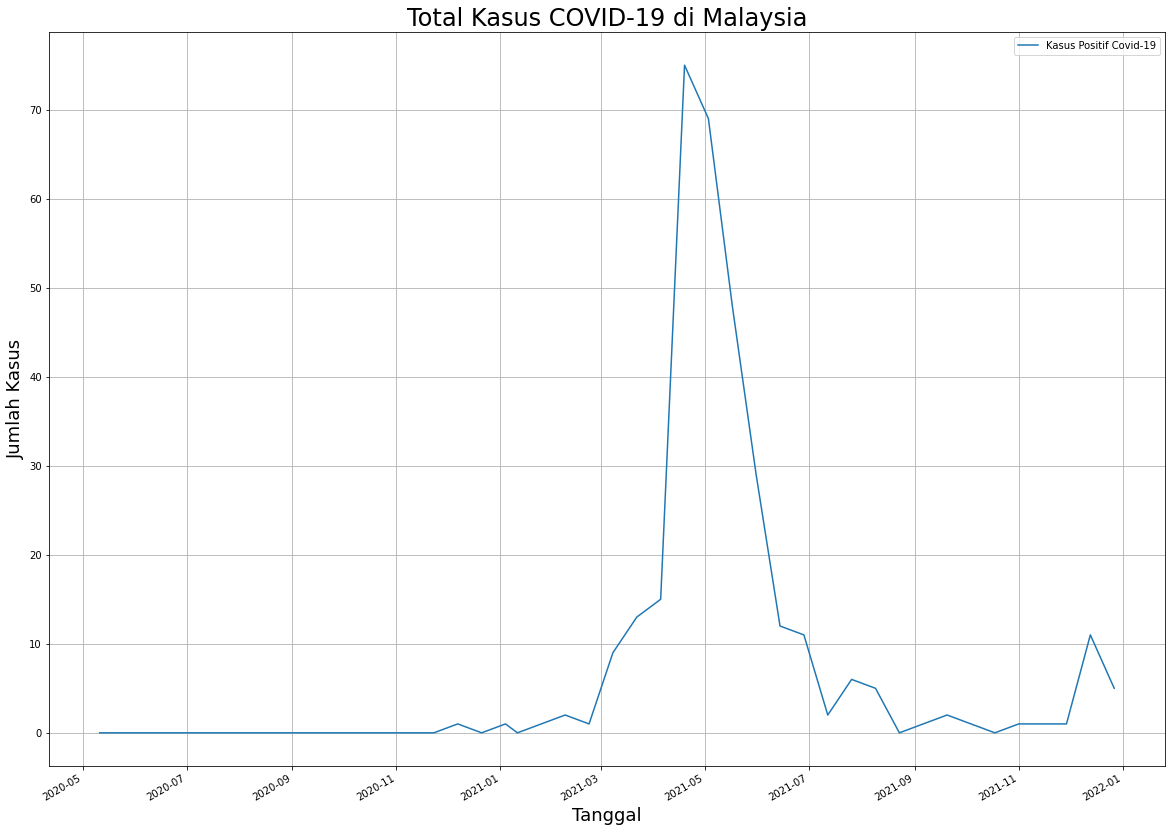

In [33]:
plt.figure(figsize=(20,15))
ax = plt.gca()
df_mal.plot(ax=ax)
ax.grid()
ax.set_xlabel('Tanggal',fontsize=18)
ax.set_ylabel('Jumlah Kasus',fontsize=18)
ax.legend(['Kasus Positif Covid-19'])
ax.set_title('Total Kasus COVID-19 di Malaysia',fontsize=24)
plt.show()

In [62]:
df_mal

,Negara,N_Positif
Tanggal,,
2020-05-11,Malaysia,0
2020-05-25,Malaysia,0
2020-06-08,Malaysia,0
2020-06-22,Malaysia,0
2020-07-20,Malaysia,0
2020-08-03,Malaysia,0
2020-08-17,Malaysia,0
2020-08-31,Malaysia,0
2020-09-14,Malaysia,0


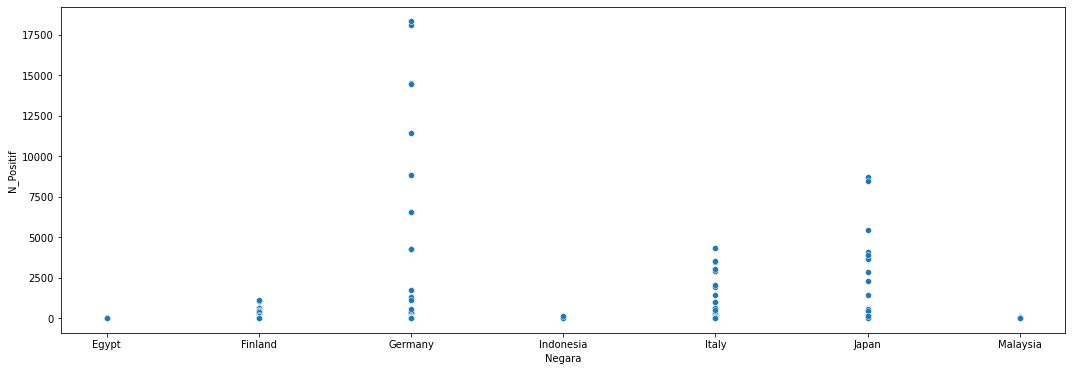

In [34]:
sns.scatterplot(data=df, x=df['Negara'], y=df['N_Positif']);

# Data Processing

In [45]:
processing = df3[['Negara']]
negara = processing['Negara'].unique()

alpha = df3[df3['Variant']=='Alpha']
a= alpha[['N_Positif']].values.flatten()
beta = df3[df3['Variant']=='Beta']
b = beta[['N_Positif']].values.flatten()
omicron = df3[df3['Variant']=='Omicron']
o = omicron[['N_Positif']].values.flatten()

datas = {
'Negara': negara,
'Alpha':a,
'Beta':b,
'Omicron': o,
}
df_new = pd.DataFrame(datas)
df_new

,Negara,Alpha,Beta,Omicron
0,Egypt,29,0,1
1,Finland,6800,1213,0
2,Germany,104138,2303,2270
3,Indonesia,81,22,130
4,Italy,26877,116,526
5,Japan,49841,101,150
6,Malaysia,33,273,17


In [46]:
countries = ['Indonesia','Malaysia','Japan','Italy','Finland']
df4 = df_new.query(" Negara in @countries " )
df4.reset_index(inplace=True)
df4

,index,Negara,Alpha,Beta,Omicron
0,1,Finland,6800,1213,0
1,3,Indonesia,81,22,130
2,4,Italy,26877,116,526
3,5,Japan,49841,101,150
4,6,Malaysia,33,273,17


In [48]:
temps = df4[['Alpha','Beta','Omicron']].values
temps

array([[ 6800,  1213,     0],
       [   81,    22,   130],
       [26877,   116,   526],
       [49841,   101,   150],
       [   33,   273,    17]])

In [49]:
def euclid(x,y):
    
    return np.linalg.norm(x-y)
lneg = len(temps)
d_matrix = [ [ round(euclid(temps[i],temps[j]),2 ) for j in range(lneg) ] for i in range(lneg)]

In [50]:
negara1 = df4[['Negara']].values.flatten()
df5 = pd.DataFrame( d_matrix,columns = negara1, index = negara1 )
df5

,Finland,Indonesia,Italy,Japan,Malaysia
Finland,0.00,6824.98,20113.83,43055.62,6832.00
Indonesia,6824.98,0.00,26799.09,49760.07,279.42
Italy,20113.83,26799.09,0.00,22967.08,26849.28
Japan,43055.62,49760.07,22967.08,0.00,49808.47
Malaysia,6832.00,279.42,26849.28,49808.47,0.00


In [52]:
d1 = df5.loc['Malaysia']
d2 = df5.columns.values
def similarity(d):
    return 1/(d+0.001)
d3 = map( lambda x,y:[ similarity(x) ] + [y] ,d1,d2)
d4 = list(d3)
d4.sort(key=lambda x:x[0],reverse=True)
d4 = d4[1:]
d4

[[0.0035788290787020305, 'Indonesia'],
 [0.00014637000199502312, 'Finland'],
 [3.724494521845855e-05, 'Italy'],
 [2.0076906195333723e-05, 'Japan']]

# Implementation Model

In [53]:
X = df[['N_Positif']]
y = df['Negara']

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [64]:
logistic_regression = LogisticRegression(solver='liblinear')
logistic_regression.fit(X_train, y_train)
y_pred = logistic_regression.predict(X_test)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

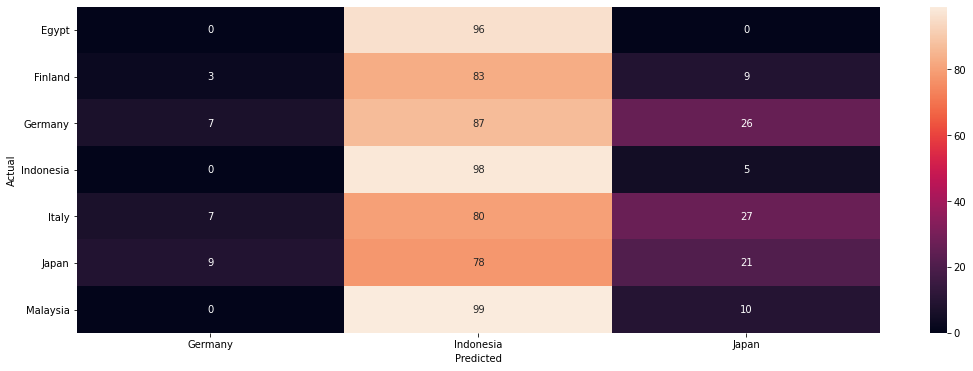

In [65]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

In [73]:
model=LogisticRegression()
model.fit(X_train,y_train)
predictions=model.predict(X_test)

In [74]:
print(classification_report(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

       Egypt       0.00      0.00      0.00        96
     Finland       0.00      0.00      0.00        95
     Germany       0.30      0.06      0.10       120
   Indonesia       0.16      0.95      0.27       103
       Italy       0.00      0.00      0.00       114
       Japan       0.21      0.19      0.20       108
    Malaysia       0.00      0.00      0.00       109

    accuracy                           0.17       745
   macro avg       0.10      0.17      0.08       745
weighted avg       0.10      0.17      0.08       745

0.1691275167785235


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
